In [39]:
# import libraries
import pandas as pd
import numpy as np
import sys
import sklearn
import io
import random
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn import preprocessing

In [2]:
from IPython.display import Image
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline

## Loading dataset

In [1]:
col_names = ["duration","protocol_type","service","flag","src_bytes",
    "dst_bytes","land","wrong_fragment","urgent","hot","num_failed_logins",
    "logged_in","num_compromised","root_shell","su_attempted","num_root",
    "num_file_creations","num_shells","num_access_files","num_outbound_cmds",
    "is_host_login","is_guest_login","count","srv_count","serror_rate",
    "srv_serror_rate","rerror_rate","srv_rerror_rate","same_srv_rate",
    "diff_srv_rate","srv_diff_host_rate","dst_host_count","dst_host_srv_count",
    "dst_host_same_srv_rate","dst_host_diff_srv_rate","dst_host_same_src_port_rate",
    "dst_host_srv_diff_host_rate","dst_host_serror_rate","dst_host_srv_serror_rate",
    "dst_host_rerror_rate","dst_host_srv_rerror_rate","label","difficulty_level"]

print(col_names)

['duration', 'protocol_type', 'service', 'flag', 'src_bytes', 'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot', 'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell', 'su_attempted', 'num_root', 'num_file_creations', 'num_shells', 'num_access_files', 'num_outbound_cmds', 'is_host_login', 'is_guest_login', 'count', 'srv_count', 'serror_rate', 'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count', 'dst_host_same_srv_rate', 'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate', 'dst_host_serror_rate', 'dst_host_srv_serror_rate', 'dst_host_rerror_rate', 'dst_host_srv_rerror_rate', 'label', 'difficulty_level']


In [2]:
import pandas as pd
df = pd.read_csv("KDDTrain+.csv", header=None, names = col_names)
df_test = pd.read_csv("KDDTest+.csv", header=None, names = col_names)

print('Dimensions of training set: ',df.shape)
print('Dimensions of testing set: ',df_test.shape)

Dimensions of training set:  (125973, 43)
Dimensions of testing set:  (22544, 43)


In [5]:
df.head(10)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label,difficulty_level
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20
1,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15
2,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19
3,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21
4,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21
5,0,tcp,private,REJ,0,0,0,0,0,0,...,0.07,0.07,0.00,0.00,0.00,0.00,1.00,1.00,neptune,21
6,0,tcp,private,S0,0,0,0,0,0,0,...,0.04,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,21
7,0,tcp,private,S0,0,0,0,0,0,0,...,0.06,0.07,0.00,0.00,1.00,1.00,0.00,0.00,neptune,21
8,0,tcp,remote_job,S0,0,0,0,0,0,0,...,0.09,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,21
9,0,tcp,private,S0,0,0,0,0,0,0,...,0.05,0.06,0.00,0.00,1.00,1.00,0.00,0.00,neptune,21


In [6]:
df.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,difficulty_level
count,125973.00000,1.259730e+05,1.259730e+05,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,...,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000
mean,287.14465,4.556674e+04,1.977911e+04,0.000198,0.022687,0.000111,0.204409,0.001222,0.395736,0.279250,...,115.653005,0.521242,0.082951,0.148379,0.032542,0.284452,0.278485,0.118832,0.120240,19.504060
std,2604.51531,5.870331e+06,4.021269e+06,0.014086,0.253530,0.014366,2.149968,0.045239,0.489010,23.942042,...,110.702741,0.448949,0.188922,0.308997,0.112564,0.444784,0.445669,0.306557,0.319459,2.291503
min,0.00000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.00000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,10.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.000000
50%,0.00000,4.400000e+01,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,63.000000,0.510000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000
75%,0.00000,2.760000e+02,5.160000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,255.000000,1.000000,0.070000,0.060000,0.020000,1.000000,1.000000,0.000000,0.000000,21.000000
max,42908.00000,1.379964e+09,1.309937e+09,1.000000,3.000000,3.000000,77.000000,5.000000,1.000000,7479.000000,...,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,21.000000


In [3]:
print('Label distribution Training set:')
print(df['label'].value_counts())
print()
print('Label distribution Test set:')
print(df_test['label'].value_counts())

Label distribution Training set:
normal             67343
neptune            41214
satan               3633
ipsweep             3599
portsweep           2931
smurf               2646
nmap                1493
back                 956
teardrop             892
warezclient          890
pod                  201
guess_passwd          53
buffer_overflow       30
warezmaster           20
land                  18
imap                  11
rootkit               10
loadmodule             9
ftp_write              8
multihop               7
phf                    4
perl                   3
spy                    2
Name: label, dtype: int64

Label distribution Test set:
normal             9711
neptune            4657
guess_passwd       1231
mscan               996
warezmaster         944
apache2             737
satan               735
processtable        685
smurf               665
back                359
snmpguess           331
saint               319
mailbomb            293
snmpgetattack       178


<Axes: >

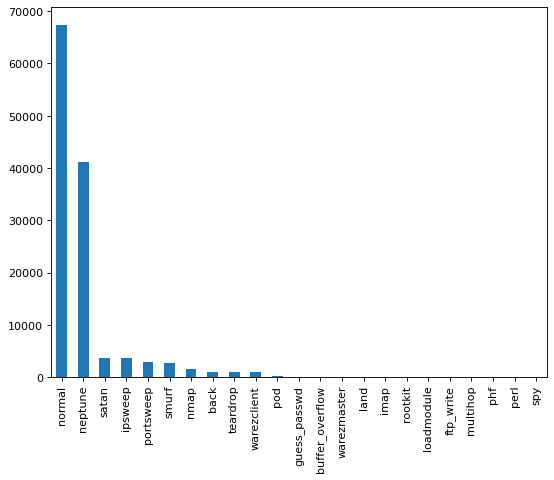

In [5]:
from matplotlib.pyplot import figure

figure(figsize=(8, 6), dpi=80)

df['label'].value_counts().plot(kind='bar')

In [4]:
df.dropna()
#df_test.dropna()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label,difficulty_level
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20
1,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15
2,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19
3,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21
4,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125968,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.06,0.00,0.00,1.00,1.00,0.00,0.00,neptune,20
125969,8,udp,private,SF,105,145,0,0,0,0,...,0.96,0.01,0.01,0.00,0.00,0.00,0.00,0.00,normal,21
125970,0,tcp,smtp,SF,2231,384,0,0,0,0,...,0.12,0.06,0.00,0.00,0.72,0.00,0.01,0.00,normal,18
125971,0,tcp,klogin,S0,0,0,0,0,0,0,...,0.03,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,20


In [5]:
print(df['label'].value_counts())

normal             67343
neptune            41214
satan               3633
ipsweep             3599
portsweep           2931
smurf               2646
nmap                1493
back                 956
teardrop             892
warezclient          890
pod                  201
guess_passwd          53
buffer_overflow       30
warezmaster           20
land                  18
imap                  11
rootkit               10
loadmodule             9
ftp_write              8
multihop               7
phf                    4
perl                   3
spy                    2
Name: label, dtype: int64


In [6]:
print(df_test['label'].value_counts())

normal             9711
neptune            4657
guess_passwd       1231
mscan               996
warezmaster         944
apache2             737
satan               735
processtable        685
smurf               665
back                359
snmpguess           331
saint               319
mailbomb            293
snmpgetattack       178
portsweep           157
ipsweep             141
httptunnel          133
nmap                 73
pod                  41
buffer_overflow      20
multihop             18
named                17
ps                   15
sendmail             14
rootkit              13
xterm                13
teardrop             12
xlock                 9
land                  7
xsnoop                4
ftp_write             3
worm                  2
loadmodule            2
perl                  2
sqlattack             2
udpstorm              2
phf                   2
imap                  1
Name: label, dtype: int64


In [7]:
df['label'] = df['label'].apply(lambda x: 0 if x == 'normal' else 1)

In [8]:
df_test['label'] = df_test['label'].apply(lambda x: 0 if x == 'normal' else 1)

In [4]:
df.shape

(125973, 43)

## Data pre processing

In [3]:
# colums that are categorical and not binary yet: protocol_type (column 2), service (column 3), flag (column 4).
# explore categorical features
print('Training set:')
for col_name in df.columns:
    if df[col_name].dtypes == 'object' :
        unique_cat = len(df[col_name].unique())
        print("Feature '{col_name}' has {unique_cat} categories".format(col_name=col_name, unique_cat=unique_cat))

#see how distributed the feature service is, it is evenly distributed and therefore we need to make dummies for all.
print()
print('Distribution of categories in service:')
print(df['service'].value_counts().sort_values(ascending=False).head())

Training set:
Feature 'protocol_type' has 3 categories
Feature 'service' has 70 categories
Feature 'flag' has 11 categories
Feature 'label' has 23 categories

Distribution of categories in service:
http        40338
private     21853
domain_u     9043
smtp         7313
ftp_data     6860
Name: service, dtype: int64


In [9]:
print('Distribution of categories in flag:')
print(df['flag'].value_counts()) 

Distribution of categories in flag:
SF        74945
S0        34851
REJ       11233
RSTR       2421
RSTO       1562
S1          365
SH          271
S2          127
RSTOS0      103
S3           49
OTH          46
Name: flag, dtype: int64


In [11]:
print('Distribution of categories in flag:')
print(df['protocol_type'].value_counts())

Distribution of categories in flag:
tcp     102689
udp      14993
icmp      8291
Name: protocol_type, dtype: int64


In [12]:
print('Distribution of categories in flag:')
print(df['service'].value_counts())

Distribution of categories in flag:
http         40338
private      21853
domain_u      9043
smtp          7313
ftp_data      6860
             ...  
tftp_u           3
http_8001        2
aol              2
harvest          2
http_2784        1
Name: service, Length: 70, dtype: int64


## Insert categorical columns into 2D array

In [4]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
categorical_columns=['protocol_type', 'service', 'flag'] 
df_categorical_values = df[categorical_columns]
testdf_categorical_values = df_test[categorical_columns]

df_categorical_values.rename(columns={'protocol_type': 'protocol_type_enc',
                                      'service': 'service_enc',
                                      'flag' : 'flag_enc'}, inplace=True, errors='raise')

testdf_categorical_values.rename(columns={'protocol_type': 'protocol_type_enc',
                                      'service': 'service_enc',
                                      'flag' : 'flag_enc'}, inplace=True, errors='raise')

df_categorical_values.head()

C:\Users\dz laptops\AppData\Local\Temp\ipykernel_14208\3560009276.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_categorical_values.rename(columns={'protocol_type': 'protocol_type_enc',
C:\Users\dz laptops\AppData\Local\Temp\ipykernel_14208\3560009276.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  testdf_categorical_values.rename(columns={'protocol_type': 'protocol_type_enc',


,protocol_type_enc,service_enc,flag_enc
0,tcp,ftp_data,SF
1,udp,other,SF
2,tcp,private,S0
3,tcp,http,SF
4,tcp,http,SF


In [5]:
"""
# train set
df_categorical_enc=df_categorical_values.apply(LabelEncoder().fit_transform)
print(df_categorical_enc.head())
"""
for feat in df_categorical_values:
    le = LabelEncoder()
    freq = df_categorical_values[feat].value_counts()
    le.fit(freq.index)
    df_categorical_values[feat] = df_categorical_values[feat].map(lambda x: le.transform([x])[0])
print(df_categorical_values.head())

C:\Users\dz laptops\AppData\Local\Temp\ipykernel_14208\2108170898.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_categorical_values[feat] = df_categorical_values[feat].map(lambda x: le.transform([x])[0])
C:\Users\dz laptops\AppData\Local\Temp\ipykernel_14208\2108170898.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_categorical_values[feat] = df_categorical_values[feat].map(lambda x: le.transform([x])[0])


   protocol_type_enc  service_enc  flag_enc
0                  1           20         9
1                  2           44         9
2                  1           49         5
3                  1           24         9
4                  1           24         9


C:\Users\dz laptops\AppData\Local\Temp\ipykernel_14208\2108170898.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_categorical_values[feat] = df_categorical_values[feat].map(lambda x: le.transform([x])[0])


In [6]:
"""
# test set
testdf_categorical_enc=testdf_categorical_values.apply(LabelEncoder().fit_transform)
print(testdf_categorical_enc.head())
"""
for feat in testdf_categorical_values:
    le = LabelEncoder()
    freq = testdf_categorical_values[feat].value_counts()
    le.fit(freq.index)
    testdf_categorical_values[feat] = testdf_categorical_values[feat].map(lambda x: le.transform([x])[0])
print(testdf_categorical_values.head())

C:\Users\dz laptops\AppData\Local\Temp\ipykernel_14208\3821877165.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  testdf_categorical_values[feat] = testdf_categorical_values[feat].map(lambda x: le.transform([x])[0])
C:\Users\dz laptops\AppData\Local\Temp\ipykernel_14208\3821877165.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  testdf_categorical_values[feat] = testdf_categorical_values[feat].map(lambda x: le.transform([x])[0])


   protocol_type_enc  service_enc  flag_enc
0                  1           45         1
1                  1           45         1
2                  1           19         9
3                  0           13         9
4                  1           55         2


C:\Users\dz laptops\AppData\Local\Temp\ipykernel_14208\3821877165.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  testdf_categorical_values[feat] = testdf_categorical_values[feat].map(lambda x: le.transform([x])[0])


In [10]:
df.shape


(125973, 43)

In [11]:
df_test.shape

(22544, 43)

In [9]:
data = df.dropna('columns')
data_test = df_test.dropna('columns')

C:\Users\dz laptops\AppData\Local\Temp\ipykernel_14208\2459929197.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only.
  data = df.dropna('columns')
C:\Users\dz laptops\AppData\Local\Temp\ipykernel_14208\2459929197.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only.
  data_test = df_test.dropna('columns')


## Join encoded parts in place of non categorical parts

In [12]:
#train data

newdf=df.join(df_categorical_values)
newdf.drop('flag', axis=1, inplace=True)
newdf.drop('protocol_type', axis=1, inplace=True)
newdf.drop('service', axis=1, inplace=True)

# test data

newdf_test=df_test.join(testdf_categorical_values)
newdf_test.drop('flag', axis=1, inplace=True)
newdf_test.drop('protocol_type', axis=1, inplace=True)
newdf_test.drop('service', axis=1, inplace=True)

print(newdf.shape)
print(newdf_test.shape)

(125973, 43)
(22544, 43)


In [13]:
print(newdf.shape)
print(newdf_test.shape)

(125973, 43)
(22544, 43)


In [16]:
print(newdf['label'].value_counts())

normal             67343
neptune            41214
satan               3633
ipsweep             3599
portsweep           2931
smurf               2646
nmap                1493
back                 956
teardrop             892
warezclient          890
pod                  201
guess_passwd          53
buffer_overflow       30
warezmaster           20
land                  18
imap                  11
rootkit               10
loadmodule             9
ftp_write              8
multihop               7
phf                    4
perl                   3
spy                    2
Name: label, dtype: int64


In [18]:
print(newdf_test['label'].value_counts())

normal             9711
neptune            4657
guess_passwd       1231
mscan               996
warezmaster         944
apache2             737
satan               735
processtable        685
smurf               665
back                359
snmpguess           331
saint               319
mailbomb            293
snmpgetattack       178
portsweep           157
ipsweep             141
httptunnel          133
nmap                 73
pod                  41
buffer_overflow      20
multihop             18
named                17
ps                   15
sendmail             14
rootkit              13
xterm                13
teardrop             12
xlock                 9
land                  7
xsnoop                4
ftp_write             3
worm                  2
loadmodule            2
perl                  2
sqlattack             2
udpstorm              2
phf                   2
imap                  1
Name: label, dtype: int64


In [14]:
newdf.shape

(125973, 43)

# MinMaxScaler

In [15]:
from sklearn.preprocessing import MinMaxScaler

numeric_col = newdf.select_dtypes(include='number').columns
numeric_col = [col for col in numeric_col if col != 'label']

scaler = MinMaxScaler()
newdf[numeric_col] = scaler.fit_transform(newdf[numeric_col])
newdf.head(5)

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label,difficulty_level,protocol_type_enc,service_enc,flag_enc
0,0.0,3.558064e-07,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00,0.00,0.00,0.05,0.00,normal,0.952381,0.5,0.289855,0.9
1,0.0,1.057999e-07,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00,0.00,0.00,0.00,0.00,normal,0.714286,1.0,0.637681,0.9
2,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00,1.00,1.00,0.00,0.00,neptune,0.904762,0.5,0.710145,0.5
3,0.0,1.681203e-07,6.223962e-06,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.04,0.03,0.01,0.00,0.01,normal,1.000000,0.5,0.347826,0.9
4,0.0,1.442067e-07,3.206260e-07,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.00,0.00,0.00,0.00,0.00,normal,1.000000,0.5,0.347826,0.9


In [16]:
numeric_col_test = newdf_test.select_dtypes(include='number').columns
numeric_col_test = [col for col in numeric_col_test if col != 'label']

newdf_test[numeric_col_test] = scaler.fit_transform(newdf_test[numeric_col])
newdf_test.head(5)

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label,difficulty_level,protocol_type_enc,service_enc,flag_enc
0,0.000000,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00,0.0,0.0,1.00,1.00,neptune,1.000000,0.5,0.714286,0.1
1,0.000000,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00,0.0,0.0,1.00,1.00,neptune,1.000000,0.5,0.714286,0.1
2,0.000035,2.066513e-04,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.02,0.0,0.0,0.00,0.00,normal,1.000000,0.5,0.301587,0.9
3,0.000000,3.183413e-07,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.28,0.0,0.0,0.00,0.00,saint,0.714286,0.0,0.206349,0.9
4,0.000017,0.000000e+00,0.000011,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.02,0.0,0.0,0.83,0.71,mscan,0.523810,0.5,0.873016,0.2


In [17]:
#all_datav2.describe().iloc[1:].apply(np.sum, index=[])
describe_info = newdf.describe()
all_zeroes_cols = describe_info.loc[:,(describe_info.iloc[1:] == 0).all()]
all_zeroes_cols

,num_outbound_cmds
count,125973.0
mean,0.0
std,0.0
min,0.0
25%,0.0
50%,0.0
75%,0.0
max,0.0


In [18]:
newdf.drop(columns=all_zeroes_cols, inplace=True)

In [19]:
#all_datav2.describe().iloc[1:].apply(np.sum, index=[])
describe_info = newdf_test.describe()
all_zeroes_cols = describe_info.loc[:,(describe_info.iloc[1:] == 0).all()]
all_zeroes_cols

,num_outbound_cmds
count,22544.0
mean,0.0
std,0.0
min,0.0
25%,0.0
50%,0.0
75%,0.0
max,0.0


In [20]:
newdf_test.drop(columns=all_zeroes_cols, inplace=True)

In [23]:
#train_x = newdf.drop('label', axis=1).values
#train_y = newdf['label'].values

#test_x = newdf_test.drop('label', axis=1).values
#test_y = newdf_test['label'].values

In [26]:
print(newdf['label'].value_counts())

normal             67343
neptune            41214
satan               3633
ipsweep             3599
portsweep           2931
smurf               2646
nmap                1493
back                 956
teardrop             892
warezclient          890
pod                  201
guess_passwd          53
buffer_overflow       30
warezmaster           20
land                  18
imap                  11
rootkit               10
loadmodule             9
ftp_write              8
multihop               7
phf                    4
perl                   3
spy                    2
Name: label, dtype: int64


In [27]:
print(newdf['label'].value_counts())

normal             67343
neptune            41214
satan               3633
ipsweep             3599
portsweep           2931
smurf               2646
nmap                1493
back                 956
teardrop             892
warezclient          890
pod                  201
guess_passwd          53
buffer_overflow       30
warezmaster           20
land                  18
imap                  11
rootkit               10
loadmodule             9
ftp_write              8
multihop               7
phf                    4
perl                   3
spy                    2
Name: label, dtype: int64


In [25]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Split the DataFrame into feature matrix (X) and target variable (y)
X = newdf.drop('label', axis=1)
y = newdf['label']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Instantiate a random forest classifier
rf = RandomForestClassifier()

# Fit the random forest classifier on the training data
rf.fit(X_train, y_train)

# Get feature importances from the trained random forest classifier
feature_importances = rf.feature_importances_

# Create a DataFrame to store feature importances
importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

# Sort the DataFrame by feature importance in descending order
importance_df = importance_df.sort_values('Importance', ascending=False)

In [26]:
# Set the maximum number of rows to display in pandas
pd.set_option('display.max_rows', None)

# Set the desired number of top features to print
top_features = importance_df.head(90)
print(top_features)

                        Feature  Importance
40                     flag_enc    0.143969
25                diff_srv_rate    0.098183
24                same_srv_rate    0.086605
34     dst_host_srv_serror_rate    0.052186
30       dst_host_diff_srv_rate    0.050917
18                        count    0.050910
21              srv_serror_rate    0.046666
37             difficulty_level    0.041488
31  dst_host_same_src_port_rate    0.039078
38            protocol_type_enc    0.038110
33         dst_host_serror_rate    0.035601
29       dst_host_same_srv_rate    0.031419
32  dst_host_srv_diff_host_rate    0.029840
8                     logged_in    0.027479
27               dst_host_count    0.027280
20                  serror_rate    0.027133
19                    srv_count    0.026269
28           dst_host_srv_count    0.024298
39                  service_enc    0.023844
35         dst_host_rerror_rate    0.023077
22                  rerror_rate    0.013025
36     dst_host_srv_rerror_rate 

In [27]:
for index, row in importance_df.iterrows():
    feature = row['Feature']
    importance = row['Importance']
    importance = int(importance * 100)  # Convert importance to integer percentage value
    print(f"Feature: {feature}, Importance: {importance}%")

Feature: flag_enc, Importance: 14%
Feature: diff_srv_rate, Importance: 9%
Feature: same_srv_rate, Importance: 8%
Feature: dst_host_srv_serror_rate, Importance: 5%
Feature: dst_host_diff_srv_rate, Importance: 5%
Feature: count, Importance: 5%
Feature: srv_serror_rate, Importance: 4%
Feature: difficulty_level, Importance: 4%
Feature: dst_host_same_src_port_rate, Importance: 3%
Feature: protocol_type_enc, Importance: 3%
Feature: dst_host_serror_rate, Importance: 3%
Feature: dst_host_same_srv_rate, Importance: 3%
Feature: dst_host_srv_diff_host_rate, Importance: 2%
Feature: logged_in, Importance: 2%
Feature: dst_host_count, Importance: 2%
Feature: serror_rate, Importance: 2%
Feature: srv_count, Importance: 2%
Feature: dst_host_srv_count, Importance: 2%
Feature: service_enc, Importance: 2%
Feature: dst_host_rerror_rate, Importance: 2%
Feature: rerror_rate, Importance: 1%
Feature: dst_host_srv_rerror_rate, Importance: 1%
Feature: src_bytes, Importance: 1%
Feature: wrong_fragment, Importance:

In [21]:
newdf.shape

(125973, 42)

In [31]:
print(newdf['label'].value_counts())

normal             67343
neptune            41214
satan               3633
ipsweep             3599
portsweep           2931
smurf               2646
nmap                1493
back                 956
teardrop             892
warezclient          890
pod                  201
guess_passwd          53
buffer_overflow       30
warezmaster           20
land                  18
imap                  11
rootkit               10
loadmodule             9
ftp_write              8
multihop               7
phf                    4
perl                   3
spy                    2
Name: label, dtype: int64


In [29]:
# Assuming 'newdf' is your DataFrame
columns_to_delete = ['srv_diff_host_rate', 'hot', 'num_compromised',
                     'dst_bytes', 'duration', 'is_guest_login', 'num_failed_logins', 'num_root', 'land',
                     'num_file_creations', 'root_shell', 'num_access_files', 'num_shells', 'su_attempted',
                     'urgent', 'is_host_login']
 
newdf = newdf.drop(columns_to_delete, axis=1) # 42 ____ 26


In [22]:
# iterate over the columns and print out the variance for columns that have a variance greater than 0.01
# Get the variance of each column starting from row 1
variances = newdf.iloc[1:].apply(pd.to_numeric, errors='coerce').var()

# Filter the variances that are greater than 0.01
filtered_variances = variances[variances > 0.01]
n=0
# Print the filtered variances along with their corresponding column names
for col_name, variance in filtered_variances.iteritems():
    n = n+1
    print(f"{n}: {col_name}: {variance}")

1: logged_in: 0.2391314870348398
2: count: 0.050215309107630356
3: srv_count: 0.020205199217738168
4: serror_rate: 0.19932356432051618
5: srv_serror_rate: 0.19983006688588176
6: rerror_rate: 0.10267962382385669
7: srv_rerror_rate: 0.10474824313816106
8: same_srv_rate: 0.19326888270151354
9: diff_srv_rate: 0.03251351209634695
10: srv_diff_host_rate: 0.06751234849730918
11: dst_host_count: 0.15135628801200435
12: dst_host_srv_count: 0.18846795638545075
13: dst_host_same_srv_rate: 0.2015561518318948
14: dst_host_diff_srv_rate: 0.03569170755202017
15: dst_host_same_src_port_rate: 0.095479980813836
16: dst_host_srv_diff_host_rate: 0.012670702346027895
17: dst_host_serror_rate: 0.19783377955817946
18: dst_host_srv_serror_rate: 0.19862192905357498
19: dst_host_rerror_rate: 0.09397818348484528
20: dst_host_srv_rerror_rate: 0.1020549975208325
21: difficulty_level: 0.011907087191602269
22: protocol_type_enc: 0.04550142134422651
23: service_enc: 0.0561243854071905
24: flag_enc: 0.0723270839120095

C:\Users\dz laptops\AppData\Local\Temp\ipykernel_14208\637413403.py:9: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for col_name, variance in filtered_variances.iteritems():


In [ ]:
#  <>
y = 0
for i in numeric_col:
  variance = newdf[i].var()
  if variance > 0.01:
    y += 1
    print(str(y) + ' - ' + str(i) + ' : ' + str(variance))


In [120]:
# Get the column names where the variance is less than or equal to 0.01
low_variance_cols = variances[variances <= 0.01].index.tolist()

# Print the column names where the variance is less than or equal to 0.01
print("Columns with variance <= 0.01:")
print(low_variance_cols)

Columns with variance <= 0.01:
['duration', 'src_bytes', 'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot', 'num_failed_logins', 'num_compromised', 'root_shell', 'su_attempted', 'num_root', 'num_file_creations', 'num_shells', 'num_access_files', 'is_host_login', 'is_guest_login']


In [25]:

newdf = newdf.drop(["duration","src_bytes", "dst_bytes", "land", "wrong_fragment", "urgent", "hot", "num_failed_logins", "num_compromised", "root_shell",
             "su_attempted", "num_root", "num_file_creations", "num_shells", "num_access_files", "is_host_login", "is_guest_login"], axis=1)
             

In [ ]:

newdf_test = newdf_test.drop(["duration","src_bytes", "dst_bytes", "land", "wrong_fragment", "urgent", "hot", "num_failed_logins", "num_compromised", "root_shell",
             "su_attempted", "num_root", "num_file_creations", "num_shells", "num_access_files", "is_host_login", "is_guest_login"], axis = 1)

In [45]:
newdf.head(5)

,src_bytes,logged_in,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,same_srv_rate,diff_srv_rate,dst_host_count,...,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label,difficulty_level,protocol_type_enc,service_enc,flag_enc
0,3.558064e-07,0.0,0.003914,0.003914,0.0,0.0,0.0,1.00,0.00,0.588235,...,0.00,0.00,0.00,0.05,0.00,normal,0.952381,0.5,0.289855,0.9
1,1.057999e-07,0.0,0.025440,0.001957,0.0,0.0,0.0,0.08,0.15,1.000000,...,0.00,0.00,0.00,0.00,0.00,normal,0.714286,1.0,0.637681,0.9
2,0.000000e+00,0.0,0.240705,0.011742,1.0,1.0,0.0,0.05,0.07,1.000000,...,0.00,1.00,1.00,0.00,0.00,neptune,0.904762,0.5,0.710145,0.5
3,1.681203e-07,1.0,0.009785,0.009785,0.2,0.2,0.0,1.00,0.00,0.117647,...,0.04,0.03,0.01,0.00,0.01,normal,1.000000,0.5,0.347826,0.9
4,1.442067e-07,1.0,0.058708,0.062622,0.0,0.0,0.0,1.00,0.00,1.000000,...,0.00,0.00,0.00,0.00,0.00,normal,1.000000,0.5,0.347826,0.9


In [91]:
newdf.to_csv("train_RF.csv")
newdf_test.to_csv("test_RF.csv")

In [82]:
newdf = pd.read_csv("train_RF.csv")
newdf_test = pd.read_csv("test_RF.csv")

In [32]:
newdf.keys()

Index(['src_bytes', 'wrong_fragment', 'logged_in', 'count', 'srv_count',
       'serror_rate', 'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate',
       'same_srv_rate', 'diff_srv_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate', 'label', 'difficulty_level',
       'protocol_type_enc', 'service_enc', 'flag_enc'],
      dtype='object')

In [39]:
print(newdf['label'].value_counts())

normal             67343
neptune            41214
satan               3633
ipsweep             3599
portsweep           2931
smurf               2646
nmap                1493
back                 956
teardrop             892
warezclient          890
pod                  201
guess_passwd          53
buffer_overflow       30
warezmaster           20
land                  18
imap                  11
rootkit               10
loadmodule             9
ftp_write              8
multihop               7
phf                    4
perl                   3
spy                    2
Name: label, dtype: int64


In [40]:
label_newdf=newdf['label']
label_newdf_test=newdf_test['label']

newlabeldf=label_newdf.replace({'normal' : 0, 'neptune' : 1 ,'back': 1, 'land': 1, 'pod': 1, 'smurf': 1, 'teardrop': 1,'mailbomb': 1, 'apache2': 1, 'processtable': 1, 'udpstorm': 1, 'worm': 1,
                           'ipsweep' : 2,'nmap' : 2,'portsweep' : 2,'satan' : 2,'mscan' : 2,'saint' : 2
                           ,'ftp_write': 3,'guess_passwd': 3,'imap': 3,'multihop': 3,'phf': 3,'spy': 3,'warezclient': 3,'warezmaster': 3,'sendmail': 3,'named': 3,'snmpgetattack': 3,'snmpguess': 3,'xlock': 3,'xsnoop': 3,'httptunnel': 3,
                           'buffer_overflow': 4,'loadmodule': 4,'perl': 4,'rootkit': 4,'ps': 4,'sqlattack': 4,'xterm': 4})

newlabeldf_test=label_newdf_test.replace({ 'normal' : 0, 'neptune' : 1 ,'back': 1, 'land': 1, 'pod': 1, 'smurf': 1, 'teardrop': 1,'mailbomb': 1, 'apache2': 1, 'processtable': 1, 'udpstorm': 1, 'worm': 1,
                           'ipsweep' : 2,'nmap' : 2,'portsweep' : 2,'satan' : 2,'mscan' : 2,'saint' : 2
                           ,'ftp_write': 3,'guess_passwd': 3,'imap': 3,'multihop': 3,'phf': 3,'spy': 3,'warezclient': 3,'warezmaster': 3,'sendmail': 3,'named': 3,'snmpgetattack': 3,'snmpguess': 3,'xlock': 3,'xsnoop': 3,'httptunnel': 3,
                           'buffer_overflow': 4,'loadmodule': 4,'perl': 4,'rootkit': 4,'ps': 4,'sqlattack': 4,'xterm': 4})

newdf['label'] = newlabeldf
newdf_test['label'] = newlabeldf_test
newdf.head(5)

,src_bytes,wrong_fragment,logged_in,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,...,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label,difficulty_level,protocol_type_enc,service_enc,flag_enc
0,3.558064e-07,0.0,0.0,0.003914,0.003914,0.0,0.0,0.0,0.0,1.00,...,0.00,0.00,0.00,0.05,0.00,0,0.952381,0.5,0.289855,0.9
1,1.057999e-07,0.0,0.0,0.025440,0.001957,0.0,0.0,0.0,0.0,0.08,...,0.00,0.00,0.00,0.00,0.00,0,0.714286,1.0,0.637681,0.9
2,0.000000e+00,0.0,0.0,0.240705,0.011742,1.0,1.0,0.0,0.0,0.05,...,0.00,1.00,1.00,0.00,0.00,1,0.904762,0.5,0.710145,0.5
3,1.681203e-07,0.0,1.0,0.009785,0.009785,0.2,0.2,0.0,0.0,1.00,...,0.04,0.03,0.01,0.00,0.01,0,1.000000,0.5,0.347826,0.9
4,1.442067e-07,0.0,1.0,0.058708,0.062622,0.0,0.0,0.0,0.0,1.00,...,0.00,0.00,0.00,0.00,0.00,0,1.000000,0.5,0.347826,0.9


In [49]:
newdf.head(5)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label,difficulty_level
0,NaN,src_bytes,logged_in,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,same_srv_rate,diff_srv_rate,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.0,3.558064122327236e-07,0.0,0.003913894324853229,0.003913894324853229,0.0,0.0,0.0,1.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1.0,1.0579987003254102e-07,0.0,0.025440313111545987,0.0019569471624266144,0.0,0.0,0.0,0.08,0.15,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2.0,0.0,0.0,0.24070450097847357,0.011741682974559686,1.0,1.0,0.0,0.05,0.07,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,3.0,1.6812034142157202e-07,1.0,0.009784735812133072,0.009784735812133072,0.2,0.2,0.0,1.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [64]:
Normal = [0]
Abnormal = [1,2,3,4]
DoS = [2,3,4]
Probe = [1,3,4]
R2L = [1,2,4]
U2R = [1,2,3]
Normal_df = newdf[newdf['label'].isin(Normal)]
Abnormal_df = newdf[newdf['label'].isin(Abnormal)]
DoS_df=newdf[newdf['label'].isin(DoS)]
Probe_df=newdf[newdf['label'].isin(Probe)]
R2L_df=newdf[newdf['label'].isin(R2L)]
U2R_df=newdf[newdf['label'].isin(U2R)]


In [71]:
Normal_df.shape

(67343, 25)

In [42]:
newdf_test.to_csv("RF_TEST.csv", index=False)   # 0

In [72]:
Normal_df.to_csv("attacks_train_RF\\normal.csv", index=False)   # 0
DoS_df.to_csv("attacks_train_RF\\dos.csv", index=False)   # 1
Probe_df.to_csv("attacks_train_RF\\probe.csv", index=False)   # 2
R2L_df.to_csv("attacks_train_RF\\r2l.csv", index=False)   # 3
U2R_df.to_csv("attacks_train_RF\\u2r.csv", index=False)   # 4

In [81]:
Normal_df_test=newdf_test[newdf_test['label'].isin(Normal)]
Abnormal_df_test = newdf_test[newdf_test['label'].isin(Abnormal)]
DoS_df_test=newdf_test[newdf_test['label'].isin(DoS)]
Probe_df_test=newdf_test[newdf_test['label'].isin(Probe)]
R2L_df_test=newdf_test[newdf_test['label'].isin(R2L)]
U2R_df_test=newdf_test[newdf_test['label'].isin(U2R)]

Normal_df_test.head(5)

,logged_in,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,...,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label,difficulty_level,protocol_type_enc,service_enc,flag_enc
2,0.0,0.001957,0.001957,0.0,0.0,0.0,0.0,1.0,0.0,0.00,...,0.02,0.00,0.0,0.00,0.00,0,1.000000,0.5,0.301587,0.9
5,1.0,0.007828,0.007828,0.0,0.0,0.0,0.0,1.0,0.0,0.00,...,0.03,0.01,0.0,0.00,0.00,0,1.000000,0.5,0.349206,0.9
6,1.0,0.001957,0.005871,0.0,0.0,0.0,0.0,1.0,0.0,1.00,...,0.00,0.00,0.0,0.72,0.04,0,1.000000,0.5,0.777778,0.9
8,1.0,0.064579,0.091977,0.0,0.0,0.0,0.0,1.0,0.0,0.04,...,0.03,0.00,0.0,0.00,0.00,0,1.000000,0.5,0.349206,0.9
11,1.0,0.001957,0.003914,0.0,0.0,0.0,0.0,1.0,0.0,1.00,...,0.00,0.00,0.0,0.33,0.00,0,0.857143,0.5,0.777778,0.9


In [93]:
U2R_df_test["label"] = 4

C:\Users\dz laptops\AppData\Local\Temp\ipykernel_10176\783647821.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  U2R_df_test["label"] = 4


In [94]:
print(U2R_df_test['label'].unique())

[4]


In [96]:
Normal_df_test.to_csv("attacks_test\\normal.csv", index=False)   # 0
Abnormal_df_test.to_csv("attacks_test\\Abnormal.csv", index=False)   # 
DoS_df_test.to_csv("attacks_test\\dos.csv", index=False)   # 1
Probe_df_test.to_csv("attacks_test\\probe.csv", index=False)   # 2
R2L_df_test.to_csv("attacks_test\\r2l.csv", index=False)   # 3
U2R_df_test.to_csv("attacks_test\\u2r.csv", index=False)   # 4

In [97]:
print('Train:')
print('Dimensions of Normal: ', Normal_df.shape)
print('Dimensions of Abnormal: ', Abnormal_df.shape)
print('Dimensions of DoS: ' ,DoS_df.shape)
print('Dimensions of Probe: ' ,Probe_df.shape)
print('Dimensions of R2L: ' ,R2L_df.shape)
print('Dimensions of U2R: ' ,U2R_df.shape)
print('Test:')
print('Dimensions of Normal: ', Normal_df_test.shape)
print('Dimensions of Abnormal: ', Abnormal_df_test.shape)
print('Dimensions of DoS: ' ,DoS_df_test.shape)
print('Dimensions of Probe: ' ,Probe_df_test.shape)
print('Dimensions of R2L: ' ,R2L_df_test.shape)
print('Dimensions of U2R: ' ,U2R_df_test.shape)

Train:
Dimensions of Normal:  (67343, 25)
Dimensions of Abnormal:  (58630, 25)
Dimensions of DoS:  (12703, 25)
Dimensions of Probe:  (46974, 25)
Dimensions of R2L:  (57635, 25)
Dimensions of U2R:  (58578, 25)
Test:
Dimensions of Normal:  (9711, 25)
Dimensions of Abnormal:  (12833, 25)
Dimensions of DoS:  (5373, 25)
Dimensions of Probe:  (10412, 25)
Dimensions of R2L:  (9948, 25)
Dimensions of U2R:  (12766, 25)


In [1]:
import pandas as pd

normal_df = pd.read_csv('attacks_train_RF/normal.csv')   # 0
dos_df = pd.read_csv('attacks_train_RF/dos.csv')   # 1
probe_df = pd.read_csv('attacks_train_RF/probe.csv')   # 2
r2L_df = pd.read_csv('attacks_train_RF/r2l.csv')   # 3
u2R_df = pd.read_csv('attacks_train_RF/u2r.csv')   # 4

NSL_KDD_Train = pd.concat([normal_df, dos_df, probe_df, r2L_df, u2R_df])

# Save the combined dataframe as CSV file
NSL_KDD_Train.to_csv('NSL-KDD-Train_RF.csv', index=False)

In [4]:
import pandas as pd

Normal_df_test = pd.read_csv('attacks_test/normal.csv')   # 0
DoS_df_test = pd.read_csv('attacks_test/dos.csv')   # 1
Probe_df_test = pd.read_csv('attacks_test/probe.csv')   # 2
R2L_df_test = pd.read_csv('attacks_test/r2l.csv')   # 3
U2R_df_test = pd.read_csv('attacks_test/u2r.csv')   # 4

NSL_KDD_Test = pd.concat([Normal_df_test, DoS_df_test, Probe_df_test, R2L_df_test, U2R_df_test])

# Save the combined dataframe as CSV file
NSL_KDD_Test.to_csv('NSL-KDD-Test.csv', index=False)

In [3]:
import pandas as pd

NSL_KDD_Train = pd.read_csv('NSL-KDD-Train.csv')

NSL_KDD_Test = pd.read_csv('NSL-KDD-Test.csv')

In [2]:
print(NSL_KDD_Train['label'].value_counts())

1    137781
0     67343
2     34968
3      2985
4       156
Name: label, dtype: int64


In [22]:
print(df['label'].value_counts())

0    67343
1    67343
Name: label, dtype: int64


In [21]:
df['label'] = df['label'].replace([4, 3, 2, 1], 1)
print(df['label'].value_counts())


0    67343
1    67343
Name: label, dtype: int64


In [83]:
df = pd.read_csv('RF_TEST.csv')

In [84]:
print(df['label'].value_counts())

1    9711
0    9711
2    9711
3    9711
4    9711
Name: label, dtype: int64


In [85]:
df.shape

(48555, 28)

In [86]:
# Group the DataFrame by the 'Label_enc' column
groups = df.groupby('label')

# Iterate through the groups and save each group to a separate CSV file
for label, group in groups:
    filename = f'{label}.csv'
    group.to_csv(filename, index=False)
    print(f'Saved {len(group)} rows to {filename}')

Saved 9711 rows to 0.csv
Saved 9711 rows to 1.csv
Saved 9711 rows to 2.csv
Saved 9711 rows to 3.csv
Saved 9711 rows to 4.csv


In [87]:
import pandas as pd

# List of file names
files = ['0.csv', '1.csv', '2.csv', '3.csv', '4.csv']

# Iterate over each file
for file in files:
    # Read the CSV file
    df = pd.read_csv(file)
    
    # Extract the 'Label' column
    labels = df['label']
    
    # Normalize the labels between 0 and 1 by dividing by 7 and round to 2 decimal places
    normalized_labels = (labels / 4)
    
    # Update the 'Label' column with the normalized values
    df['label'] = normalized_labels
    
    # Save the updated DataFrame to a new CSV file
    new_filename = file
    df.to_csv(new_filename, index=False)
    
    print(f"Normalized saved to {new_filename}")

Normalized saved to 0.csv
Normalized saved to 1.csv
Normalized saved to 2.csv
Normalized saved to 3.csv
Normalized saved to 4.csv


In [ ]:
"""Normal_df_test = pd.read_csv('attacks_test/normal.csv')   # 0
DoS_df_test = pd.read_csv('attacks_test/dos.csv')   # 1
Probe_df_test = pd.read_csv('attacks_test/probe.csv')   # 2
R2L_df_test = pd.read_csv('attacks_test/r2l.csv')   # 3
U2R_df_test = pd.read_csv('attacks_test/u2r.csv')   # 4"""

In [92]:
import numpy as np
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt

# Load the CSV file into a pandas DataFrame
web_attack_train = pd.read_csv('0.csv')

# Reshape the DataFrame into a 2D matrix
matrix = web_attack_train.values.reshape(web_attack_train.shape)

# Normalize the matrix to the range [0, 1]
normalized_matrix = (matrix - matrix.min()) / (matrix.max() - matrix.min())

# Apply a colormap to convert the matrix to RGB values
cmap = plt.get_cmap('gray')
colored_matrix = cmap(normalized_matrix)

# Remove the extra dimension from the colored matrix
colored_matrix = np.squeeze(colored_matrix)

# Convert the colored matrix into a PIL Image
image = Image.fromarray(np.uint8(colored_matrix*255))

# Save the image
image.save('RF_TEST/normal.png')

In [97]:
import numpy as np
from patchify import patchify
from PIL import Image

image = Image.open("RF_TEST/normal.png")
image_array = np.asarray(image)
patches = patchify(image_array, (224, 28, 3), step=224)
print(patches.shape)

for i in range(patches.shape[0]):
    for j in range(patches.shape[1]):
        patch = patches[i, j, 0]
        patch = Image.fromarray(patch)
        num = i * patches.shape[1] + j
        patch.save(f"patch_RF_TEST/patch_normal_{num}.png")

(43, 1, 1, 224, 28, 3)


In [98]:
import os
import csv

path = 'patch_RF_TEST/'
labels = []

for filename in os.listdir(path):
    if 'normal' in filename:
        label = 0
        labels.append(label)
    """if 'attack' in filename:
        label = 1
        labels.append(label)"""
    if 'dos' in filename:
        label = 1
        labels.append(label)
    if 'probe' in filename:
        label = 2
        labels.append(label)
    if 'R2L' in filename:
        label = 3
        labels.append(label)
    if 'U2R' in filename:
        label = 4
        labels.append(label)

with open('labels_RF_TEST/labels_rf_test.csv', 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)
    for label in labels:
        writer.writerow([label]) 
    

In [102]:
import numpy as np
from PIL import Image
import os

path = 'patch_RF_TEST/'
images = []

for filename in os.listdir(path):
    if filename.endswith('.jpeg') or filename.endswith('.png'):
        img = Image.open(os.path.join(path, filename))
        images_arr_train = np.array(img)
        images.append(images_arr_train)

images_arr_train = np.array(images)
print(images_arr_train.shape)

(215, 224, 28, 3)


In [103]:
import pandas as pd

labels_train = pd.read_csv("labels_RF_TEST/labels_rf_test.csv", header=None)

print('labels train shape : ' + str(labels_train.shape))

labels train shape : (215, 1)


In [104]:
print(labels_train.value_counts())

0    43
1    43
2    43
3    43
4    43
dtype: int64


In [5]:
print(labels_test.value_counts())

0    56
1    56
2    56
3    56
4    56
dtype: int64


In [220]:
print(NSL_KDD_Train['label'].value_counts())

1    137781
0     67343
2     34968
3      2985
4       156
Name: label, dtype: int64


In [55]:
df = pd.read_csv('test_RF.csv')

In [62]:
df.shape

(48555, 28)

In [61]:
print(df['label'].value_counts())

1    9711
0    9711
2    9711
3    9711
4    9711
Name: label, dtype: int64


In [6]:
from imblearn.under_sampling import RandomUnderSampler
import pandas as pd

X = df.drop('label', axis=1)
y = df['label']

rus = RandomUnderSampler(sampling_strategy={1: 67343}, random_state=42)
X_resampled, y_resampled = rus.fit_resample(X, y)

df = pd.concat([pd.DataFrame(X_resampled), pd.DataFrame(y_resampled)], axis=1)
df.columns = list(X.columns) + ['label']

In [60]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE
import pandas as pd

X = df.drop('label', axis=1)
y = df['label']

ros = RandomOverSampler(sampling_strategy={2:9711, 3:9711, 4:9711, 1:9711}, random_state=42)
X_resampled, y_resampled = ros.fit_resample(X, y)

df = pd.concat([pd.DataFrame(X_resampled), pd.DataFrame(y_resampled)], axis=1)
df.columns = list(X.columns) + ['label']

In [63]:
df.to_csv('RF_TEST.csv', index=False)

In [6]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow_addons as tfa

In [7]:
num_classes = 5
input_shape = (224, 25, 3)

In [8]:
learning_rate = 0.001
weight_decay = 0.0001
batch_size = 40
num_epochs = 50
image_size = 224  # We'll resize input images to this size
patch_size = 16  # Size of the patches to be extract from the input images
num_patches = (image_size // patch_size) ** 2
projection_dim = 64
num_heads = 4
transformer_units = [
    projection_dim * 2,
    projection_dim,
]  # Size of the transformer layers
transformer_layers = 8
mlp_head_units = [2048, 1024]  # Size of the dense layers of the final classifier

In [9]:
data_augmentation = keras.Sequential(
    [
        layers.Normalization(),
        layers.Resizing(image_size, image_size),
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(factor=0.02),
        layers.RandomZoom(
            height_factor=0.2, width_factor=0.2
        ),
    ],
    name="data_augmentation",
)
# Compute the mean and the variance of the training data for normalization.
data_augmentation.layers[0].adapt(images_arr_train)

In [10]:
def mlp(x, hidden_units, dropout_rate):
    for units in hidden_units:
        x = layers.Dense(units, activation=tf.nn.gelu)(x)
        x = layers.Dropout(dropout_rate)(x)
    return x

In [11]:
class Patches(layers.Layer):
    def __init__(self, patch_size):
        super().__init__()
        self.patch_size = patch_size

    def call(self, images):
        batch_size = tf.shape(images)[0]
        patches = tf.image.extract_patches(
            images=images,
            sizes=[1, self.patch_size, self.patch_size, 1],
            strides=[1, self.patch_size, self.patch_size, 1],
            rates=[1, 1, 1, 1],
            padding="VALID",
        )
        patch_dims = patches.shape[-1]
        patches = tf.reshape(patches, [batch_size, -1, patch_dims])
        return patches

Image size: 224 X 224
Patch size: 16 X 16
Patches per image: 196
Elements per patch: 768


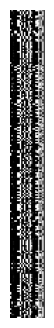

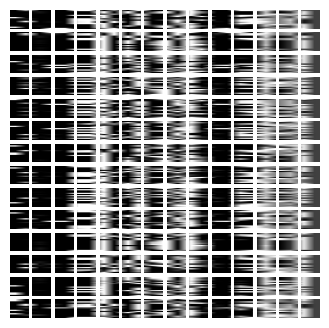

In [12]:
import matplotlib.pyplot as plt

plt.figure(figsize=(4, 4))
image = images_arr_train[np.random.choice(images_arr_train.shape[-1])]
plt.imshow(image.astype("uint8"))
plt.axis("off")

resized_image = tf.image.resize(
    tf.convert_to_tensor([image]), size=(image_size, image_size)
)
patches = Patches(patch_size)(resized_image)
print(f"Image size: {image_size} X {image_size}")
print(f"Patch size: {patch_size} X {patch_size}")
print(f"Patches per image: {patches.shape[1]}")
print(f"Elements per patch: {patches.shape[-1]}")

n = int(np.sqrt(patches.shape[1]))
plt.figure(figsize=(4, 4))
for i, patch in enumerate(patches[0]):
    ax = plt.subplot(n, n, i + 1)
    patch_img = tf.reshape(patch, (patch_size, patch_size, 3))
    plt.imshow(patch_img.numpy().astype("uint8"))
    plt.axis("off")

In [13]:
class PatchEncoder(layers.Layer):
    def __init__(self, num_patches, projection_dim):
        super().__init__()
        self.num_patches = num_patches
        self.projection = layers.Dense(units=projection_dim)
        self.position_embedding = layers.Embedding(
            input_dim=num_patches, output_dim=projection_dim
        )

    def call(self, patch):
        positions = tf.range(start=0, limit=self.num_patches, delta=1)
        encoded = self.projection(patch) + self.position_embedding(positions)
        return encoded

In [14]:
def create_vit_classifier():
    inputs = layers.Input(shape=input_shape)
    # Augment data.
    augmented = data_augmentation(inputs)
    # Create patches.
    patches = Patches(patch_size)(augmented)
    # Encode patches.
    encoded_patches = PatchEncoder(num_patches, projection_dim)(patches)

    # Create multiple layers of the Transformer block.
    for _ in range(transformer_layers):
        # Layer normalization 1.
        x1 = layers.LayerNormalization(epsilon=1e-6)(encoded_patches)
        # Create a multi-head attention layer.
        attention_output = layers.MultiHeadAttention(
            num_heads=num_heads, key_dim=projection_dim, dropout=0.1
        )(x1, x1)
        # Skip connection 1.
        x2 = layers.Add()([attention_output, encoded_patches])
        # Layer normalization 2.
        x3 = layers.LayerNormalization(epsilon=1e-6)(x2)
        # MLP.
        x3 = mlp(x3, hidden_units=transformer_units, dropout_rate=0.1)
        # Skip connection 2.
        encoded_patches = layers.Add()([x3, x2])

    # Create a [batch_size, projection_dim] tensor.
    representation = layers.LayerNormalization(epsilon=1e-6)(encoded_patches)
    representation = layers.Flatten()(representation)
    representation = layers.Dropout(0.5)(representation)
    # Add MLP.
    features = mlp(representation, hidden_units=mlp_head_units, dropout_rate=0.5)
    # Classify outputs.
    logits = layers.Dense(num_classes)(features)
    # Create the Keras model.
    model = keras.Model(inputs=inputs, outputs=logits)
    model.compile(optimizer= 'adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

In [15]:
def run_experiment(model):
    optimizer = tfa.optimizers.AdamW(
        learning_rate=learning_rate, weight_decay=weight_decay
    )

    model.compile(
        optimizer=optimizer,
        loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
        metrics=[
            keras.metrics.SparseCategoricalAccuracy(name="accuracy"),
            keras.metrics.SparseTopKCategoricalAccuracy(5, name="top-5-accuracy"),
            keras.metrics.SparseCategoricalCrossentropy(name = "Crossentropy"),
        ],
    )

    checkpoint_filepath = "tmp/checkpoint/"
    checkpoint_callback = keras.callbacks.ModelCheckpoint(
        checkpoint_filepath,
        monitor="val_accuracy",
        save_best_only=True,
        save_weights_only=True,
    )

    history = model.fit(
        x=images_arr_train,
        y=labels_train,
        batch_size=batch_size,
        epochs=num_epochs,
        validation_split=0.1,
        callbacks=[checkpoint_callback],
    )

    model.load_weights(checkpoint_filepath)
    _, accuracy, top_5_accuracy, Crossentropy = model.evaluate(images_arr_train, labels_train)
    print(f"Test accuracy: {round(accuracy * 100, 2)}%")
    print(f"Test top 5 accuracy: {round(top_5_accuracy * 100, 2)}%")
    print(f"Test crossentropy: {round(Crossentropy)}%")

    model.save("my_model_test_3.h5")
    return history, model
    

vit_classifier = create_vit_classifier()
history = run_experiment(vit_classifier)


Epoch 1/50
34/34 [==============================] - 139s 3s/step - loss: 2.5283 - accuracy: 0.6385 - top-5-accuracy: 1.0000 - Crossentropy: 2.1379 - val_loss: 5.6116 - val_accuracy: 0.0000e+00 - val_top-5-accuracy: 1.0000 - val_Crossentropy: 1.3878
Epoch 2/50
34/34 [==============================] - 121s 4s/step - loss: 1.1129 - accuracy: 0.7815 - top-5-accuracy: 1.0000 - Crossentropy: 0.8608 - val_loss: 36.5777 - val_accuracy: 0.0000e+00 - val_top-5-accuracy: 1.0000 - val_Crossentropy: 16.5182
Epoch 3/50
34/34 [==============================] - 121s 4s/step - loss: 0.6027 - accuracy: 0.8400 - top-5-accuracy: 1.0000 - Crossentropy: 0.7073 - val_loss: 29.5407 - val_accuracy: 0.0000e+00 - val_top-5-accuracy: 1.0000 - val_Crossentropy: 16.2297
Epoch 4/50
34/34 [==============================] - 115s 3s/step - loss: 0.4858 - accuracy: 0.8689 - top-5-accuracy: 1.0000 - Crossentropy: 0.6004 - val_loss: 28.2374 - val_accuracy: 0.0000e+00 - val_top-5-accuracy: 1.0000 - val_Crossentropy: 16.156

47/47 [==============================] - 45s 933ms/step
false positives : [  0 373 488   1 238]
false negatives : [300 189 300 300  11]
true negatives : [1200  827  712 1199  962]
true positive : [  0 111   0   0 289]


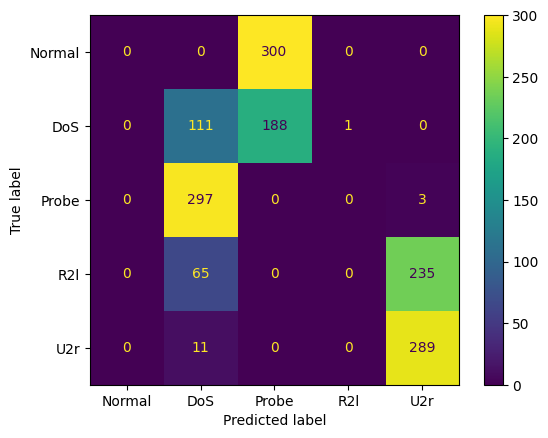

In [16]:
from sklearn.metrics import confusion_matrix
from sklearn import metrics
# Evaluate the model on the test dataset
y_pred = vit_classifier.predict(images_arr_train)
y_pred_classes = np.argmax(y_pred, axis=1)

# Compute the confusion matrix
conf_matrix = confusion_matrix(labels_train, y_pred_classes)

# Compute the false positive rate
false_positives = conf_matrix.sum(axis=0) - np.diag(conf_matrix)
false_negatives = conf_matrix.sum(axis=1) - np.diag(conf_matrix)
true_negatives = conf_matrix.sum() - (false_positives + false_negatives + np.diag(conf_matrix))
true_positives = np.diag(conf_matrix)
false_positive_rate = false_positives / (false_positives + true_negatives)

print ("false positives : " + str (false_positives))
print ("false negatives : " + str (false_negatives))
print("true negatives : " + str (true_negatives))
print("true positive : " + str(true_positives))


conf_mat_display = metrics.ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=["Normal", "DoS", "Probe", "R2l", "U2r"])
conf_mat_display.plot()
plt.show()